# 범죄 발생 시간대 및 요일

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False #한글 폰트

df = pd.read_csv('범죄 발생 시간대 및 요일.csv', encoding='cp949')#데이터불러오기

In [2]:
df.head()

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,미상,일,월,화,수,목,금,토
0,강력범죄,살인기수,15,21,20,28,38,33,43,49,50,38,45,48,40,37,49,40
1,강력범죄,살인미수등,33,50,29,44,46,60,66,82,72,71,70,68,62,73,85,53
2,강력범죄,강도,105,131,44,59,68,72,81,107,131,111,113,116,105,124,121,108
3,강력범죄,강간,630,885,417,293,325,311,425,719,1305,869,686,734,719,682,722,898
4,강력범죄,유사강간,102,110,57,62,60,55,66,89,181,145,99,109,92,89,112,136


In [3]:
df.tail()

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,미상,일,월,화,수,목,금,토
33,노동범죄,노동범죄,20,41,80,124,125,117,53,78,337,85,162,139,168,175,143,103
34,안보범죄,안보범죄,2,0,0,10,18,10,3,6,120,36,25,13,22,25,24,24
35,선거범죄,선거범죄,0,1,22,121,53,34,38,3,339,65,90,91,100,113,95,57
36,병역범죄,병역범죄,3,1,20,1440,285,55,58,19,10831,111,3068,3580,1940,2082,1834,97
37,기타범죄,기타범죄,10376,9184,9935,31337,22841,20037,18200,22421,95837,25278,39244,37277,36996,37250,37367,26756


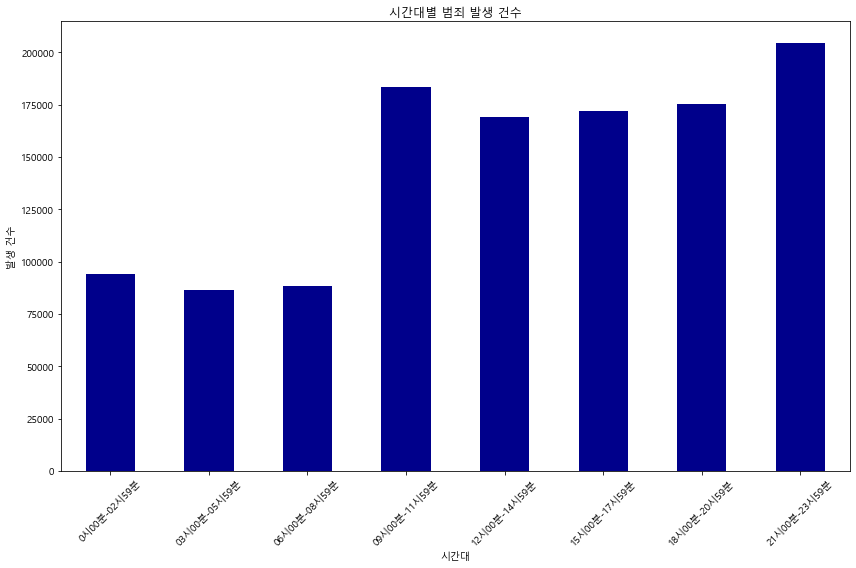

In [4]:
time_columns = ["0시00분-02시59분", "03시00분-05시59분", "06시00분-08시59분", "09시00분-11시59분", 
                "12시00분-14시59분", "15시00분-17시59분", "18시00분-20시59분", "21시00분-23시59분"]
time_totals = df[time_columns].sum()

plt.figure(figsize=(12, 8))
time_totals.plot(kind='bar', color='darkblue')
plt.title('시간대별 범죄 발생 건수')
plt.xlabel('시간대')
plt.ylabel('발생 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

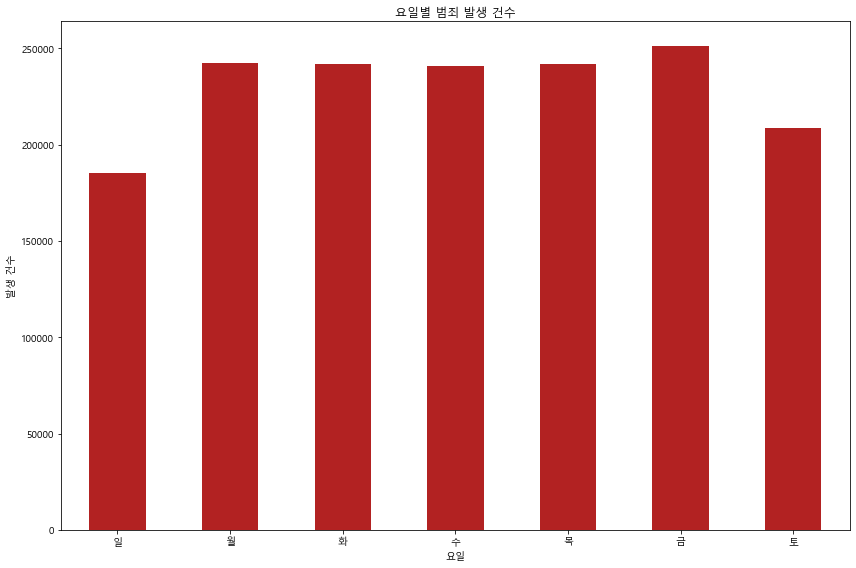

In [5]:
df_days = pd.DataFrame(df)

day_columns = ["일", "월", "화", "수", "목", "금", "토"]
day_totals = df_days[day_columns].sum()

# 요일별 범죄 발생 건수 막대 그래프
plt.figure(figsize=(12, 8))
day_totals.plot(kind='bar', color='firebrick')
plt.title('요일별 범죄 발생 건수')
plt.xlabel('요일')
plt.ylabel('발생 건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

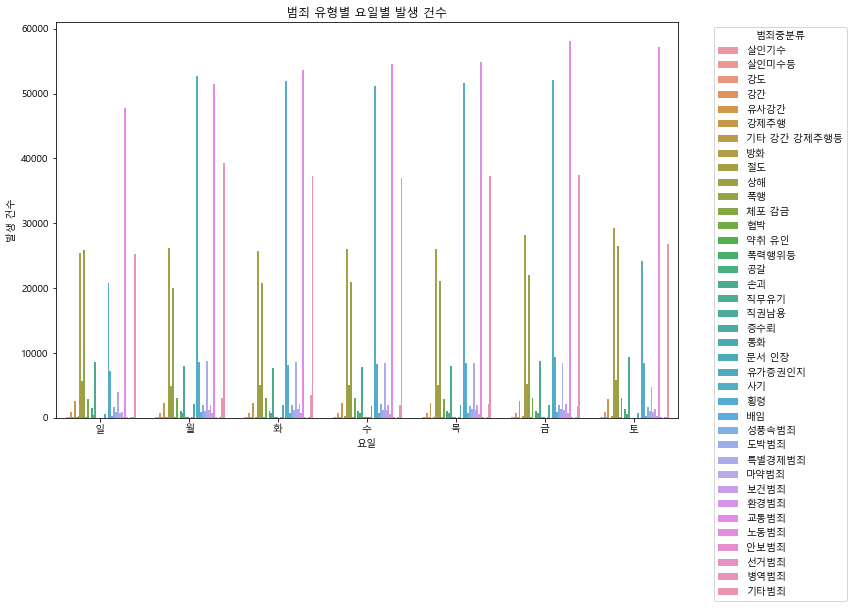

In [23]:
import seaborn as sns
df_melted = pd.melt(df, id_vars=["범죄대분류", "범죄중분류"], 
                    value_vars=["일", "월", "화", "수", "목", "금", "토"],
                    var_name="요일", value_name="발생 건수")

order = ["일", "월", "화", "수", "목", "금", "토"]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="요일", y="발생 건수", hue="범죄중분류", order=order)
plt.title("범죄 유형별 요일별 발생 건수")
plt.xlabel("요일")
plt.ylabel("발생 건수")
plt.legend(title='범죄중분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()